In [6]:
import gc 
import numpy as np
import matplotlib.pyplot as plt
from ete3 import Tree

In [7]:
path ='/Users/lkn315/Library/CloudStorage/OneDrive-UniversityofCopenhagen/stochastic_phylogenetic_models_of_shape/sim-30-leaves/simdata_ka=0.01_ks=0.6/31431760247935912/' 
simdata = np.genfromtxt(path + 'flat_true_tree.csv', delimiter=',')
levelorder_tree = Tree('../levelorder_chazot_full_tree.nw')
nnodes = 59

In [8]:
# get innernode idx
leafidx = []
for leaf in levelorder_tree:
    leafidx.append(int(leaf.name))
    
leafidxint = [int(leafidx[i]) for i in range(len(leafidx))]
nodes = list(range(nnodes))
inneridx = set(nodes)-set(leafidxint)

In [9]:
leafidx

[3,
 4,
 11,
 17,
 18,
 19,
 20,
 27,
 28,
 29,
 39,
 40,
 9,
 31,
 41,
 42,
 33,
 43,
 44,
 35,
 45,
 46,
 47,
 51,
 52,
 53,
 54,
 55,
 57,
 58]

150

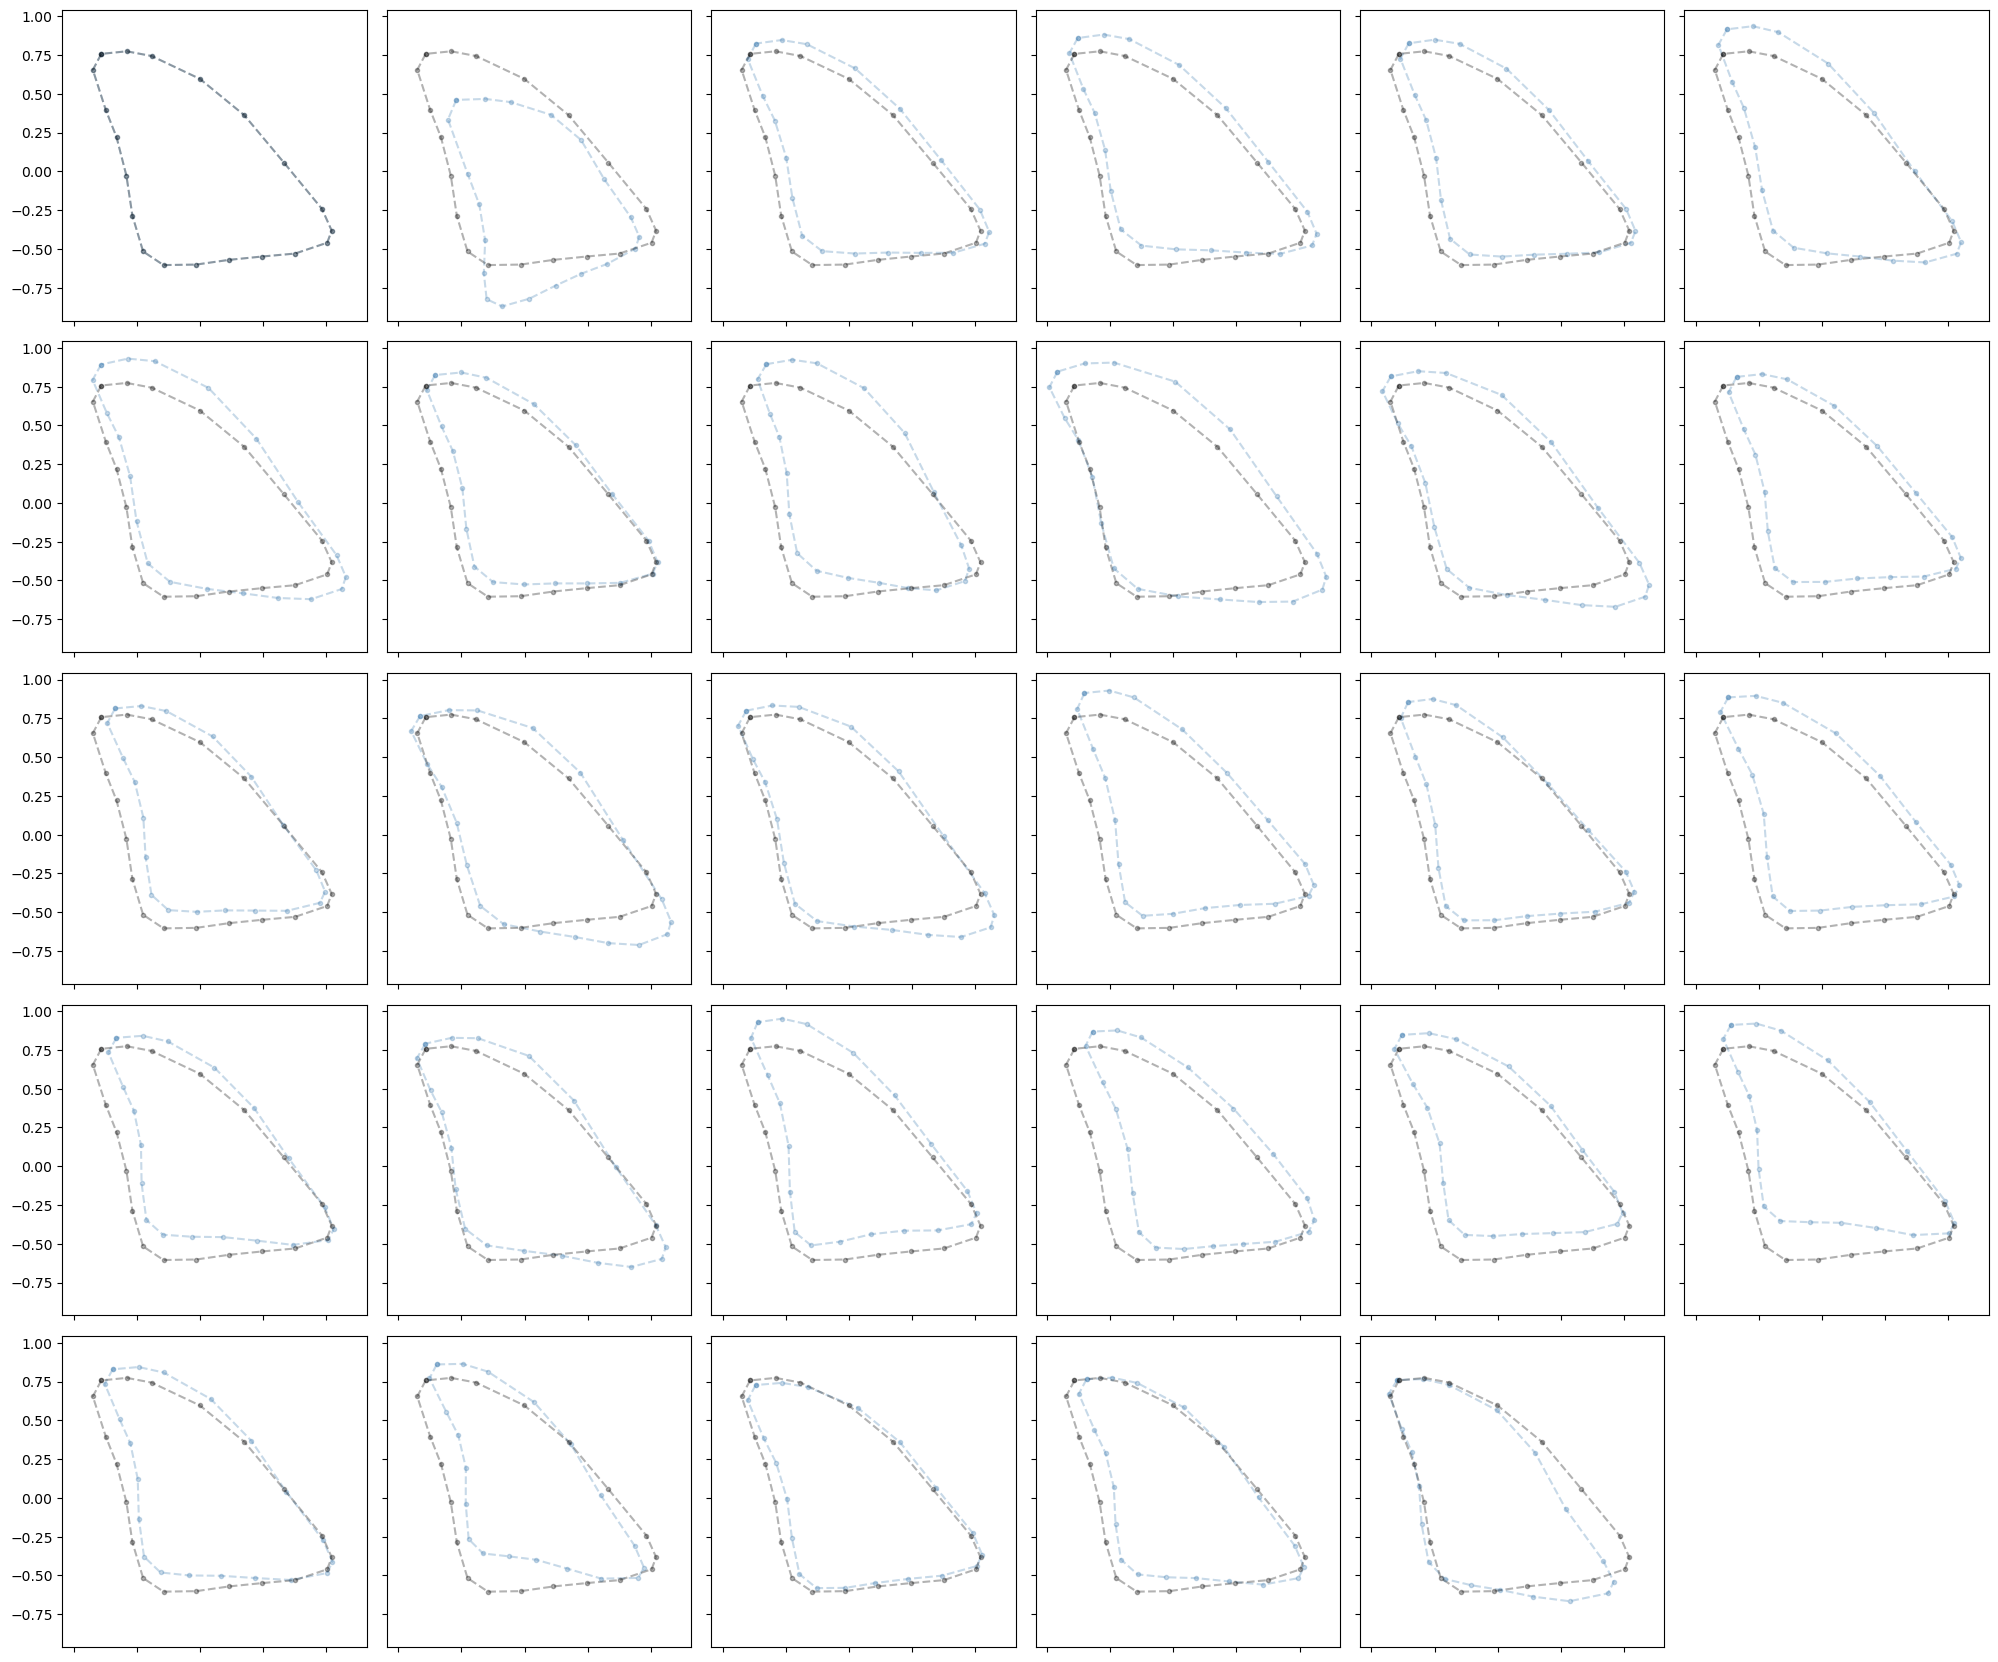

In [10]:
# plot posterior
n_nodes = len(inneridx) 
# Determine the grid size
grid_size = int(np.ceil(np.sqrt(n_nodes)))

# Create subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a scatter plot for each k
k=0
root = simdata[0,:]
rootf = np.append(root, root[0:2],0)
for idx in inneridx: # loop over i innernodes
    innernodes = simdata[idx,:]
    inode = np.append(innernodes, innernodes[0:2],0)
    axes[k].plot(inode[::2], inode[1::2], '--.', color='steelblue', alpha=0.3, label='true shape')
    axes[k].plot(rootf[::2], rootf[1::2], '--.', color='black', alpha=0.3, label='true shape')
    #fig.suptitle(f'Node {idx}', size=40);
    k+=1
# Hide any unused subplots
for j in range(n_nodes, grid_size * grid_size):
    fig.delaxes(axes[j])

#fig.suptitle(f'kalpha1={round(params['k_alpha_1'].value, 2)}, kalpha2={round(params['k_alpha_2'].value,2)}, k_sigma={round(params['k_sigma'].value,2)} and min_weight={round(params['min_weight'].value,2)}')
plt.tight_layout()
#fig.subplots_adjust(top=0.95)
#plt.show()
gc.collect()